# Project 1 Draft 1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

##  1. Summary statistics

##### 1.1 Load the dataset

In [138]:
hist = pd.read_csv('data\inputdata_hist.csv')
hist

C:\Users\Lisa\AppData\Local\Temp\ipykernel_7756\4247845863.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  hist = pd.read_csv('data\inputdata_hist.csv')


,iso3,early_urban,x,y,nat_id,subnat_id,layer,growing_period,landsuit,ruggedness,...,lt2_CRUTS32_Hist_8110,td2_CRUTS32_Hist_8110,tmp_CRUTS32_Hist_8110,cbt_CRUTS32_Hist_8110,ta0_CRUTS32_Hist_8110,ts3_CRUTS32_Hist_8110,ts2_CRUTS32_Hist_8110,fst_CRUTS32_Hist_8110,fss_CRUTS32_Hist_8110,tas_sd
0,AFG,False,60.625,33.125,Afghanistan,AFG.7_1,1.057659e+06,40.555556,0.004000,41214.875000,...,365.000000,25.217777,19.723333,669.555556,669.555556,6602.111111,7198.222222,0.000000,0.000000,3.038465
1,AFG,False,60.625,33.625,Afghanistan,AFG.12_1,1.061248e+06,53.333333,0.007000,41025.343750,...,365.000000,25.368888,19.303333,622.666667,622.666667,6430.000000,7044.666667,0.000000,0.000000,3.158750
2,AFG,False,60.625,33.875,Afghanistan,AFG.12_1,1.064223e+06,69.666667,0.007000,38227.828125,...,365.000000,25.433333,19.204444,611.777778,611.777778,6392.555556,7009.222222,0.000000,0.000000,3.212584
3,AFG,False,60.625,34.125,Afghanistan,AFG.12_1,1.067975e+06,78.666667,0.020000,40167.843750,...,365.000000,25.486666,19.111111,603.333333,603.333333,6358.444444,6975.444444,0.000000,0.000000,3.258153
4,AFG,False,60.875,31.625,Afghanistan,AFG.7_1,1.088254e+06,27.888889,0.005000,97272.710938,...,365.000000,24.614444,20.084444,716.444444,716.444444,6773.777778,7330.000000,0.000000,0.000000,2.768089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237031,SRB,NaN,22.625,43.375,Serbia,SRB.23_1,5.252321e+04,138.000000,0.806000,397800.500000,...,212.444444,21.919999,7.517778,-205.888889,-379.888889,2452.555556,2861.000000,0.222346,0.206724,3.543312
237032,SRB,NaN,22.875,43.125,Serbia,SRB.12_1,7.838075e+04,145.666667,0.806000,262345.812500,...,221.666667,21.805555,8.311111,-193.777778,-290.555556,2662.444444,3074.444444,0.186518,0.178935,3.486124
237033,MNE,NaN,18.875,42.125,Montenegro,MNE.6_1,3.546892e+05,288.333333,0.886000,423750.500000,...,335.333333,19.463333,13.953333,443.333333,443.333333,4266.333333,4999.000000,0.000000,0.000000,2.822528
237034,MNE,NaN,19.125,41.875,Montenegro,MNE.2_1,3.506572e+05,297.333333,0.886000,244882.718750,...,348.000000,19.620000,14.853333,524.333333,524.333333,4603.000000,5338.333333,0.000000,0.000000,2.739449


In [139]:
## Return full list of columns and the number of columns in raw data
hist_column_names = hist.columns.values.tolist()
print(hist_column_names)
print(len(hist_column_names))

['iso3', 'early_urban', 'x', 'y', 'nat_id', 'subnat_id', 'layer', 'growing_period', 'landsuit', 'ruggedness', 'precip', 'temperature', 'dist_sea', 'elevation', 'coastal', 'malaria', 'pop_dens_gpw', 'land_area_gpw', 'pop_count_ghs', 'pop_count_ls', 'pop_dens_ghs', 'pop_dens_ls', 'latitude', 'harbor25', 'river25', 'lake25', 'continent', 'large', 'biome1', 'biome2', 'biome3', 'biome4', 'biome5', 'biome6', 'biome7', 'biome8', 'biome9', 'biome10', 'biome11', 'biome12', 'pop_dens_gpw_log', 'pop_dens_ghs_log', 'pop_dens_ls_log', 'lac_CRUTS32_Hist_8110', 'lb2_CRUTS32_Hist_8110', 'ld1_CRUTS32_Hist_8110', 'ndd_CRUTS32_Hist_8110', 'ndd2_CRUTS32_Hist_8110', 'lgd_CRUTS32_Hist_8110', 'ld2_CRUTS32_Hist_8110', 'np2_CRUTS32_Hist_8110', 'lgb_CRUTS32_Hist_8110', 'rid_CRUTS32_Hist_8110', 'ri2_CRUTS32_Hist_8110', 'riS_CRUTS32_Hist_8110', 'riW_CRUTS32_Hist_8110', 'nex_8110', 'nex2_8110', 'ndr_CRUTS32_Hist_8110', 'rfm_CRUTS32_Hist_8110', 'prc_CRUTS32_Hist_8110', 'epx_8110', 'epx2_8110', 'eta_CRUTS32_Hist_811

##### 1.2 Clean data

Group the variables to different sub-lists. The five categories are:
1) **Baseline variables**, extracted from Henderson et al., that features basic geo-climate variable
2) **Length of Growth Period (LGP) variables**, with specifications for dry and wet weather conditions for soil growth
3) **Moisture variables**, with information on precipitation and water gain
4) **Crop-Suitability variables**, with indexes on the grid cell's suitability for the 11 largest calories production crops essential to human survival
5) **Thermal variables**, with annual average temperatures and number of days above or below extreme temperature

In [140]:
## Define variable lists, ALL VARIABLES CONTINUOUS
'''
According to Weil et al., commented variables are ommited because:
1) Definition overlap
2) Linearly dependent
3) Assume irrigation
4) Indicate beginning date (e.g. beginning plant date of prominent crop)
5) Sifnificant missing data
'''
base_var = ['iso3', 'early_urban', 'x', 'y', 'nat_id', 'subnat_id', 'layer', 
            'growing_period', 'landsuit', 'ruggedness', 'precip', 'temperature', 
            'dist_sea', 'elevation', 'coastal', 'malaria', 'pop_dens_gpw', 'land_area_gpw', 
            'pop_count_ghs', 'pop_count_ls', 'pop_dens_ghs', 'pop_dens_ls', 'latitude', 
            'harbor25', 'river25', 'lake25', 'continent']
grow = ['lac_CRUTS32_Hist_8110', 
#        'lb2_CRUTS32_Hist_8110', 
        'ld1_CRUTS32_Hist_8110', 
        'ndd_CRUTS32_Hist_8110', 'ndd2_CRUTS32_Hist_8110', 'lgd_CRUTS32_Hist_8110', 
#         'ld2_CRUTS32_Hist_8110' 
#         ,'np2_CRUTS32_Hist_8110', 'lgb_CRUTS32_Hist_8110'
       ]
moist = ['rid_CRUTS32_Hist_8110', 
#          'ri2_CRUTS32_Hist_8110', 
#          'riS_CRUTS32_Hist_8110', 'riW_CRUTS32_Hist_8110', 
         'nex_8110', 
#          'nex2_8110', 
         'ndr_CRUTS32_Hist_8110', 
         'rfm_CRUTS32_Hist_8110', 'prc_CRUTS32_Hist_8110', 'epx_8110', 
#          'epx2_8110', 
#          'eta_CRUTS32_Hist_8110', 'et0_CRUTS32_Hist_8110'
        ]
crop_suit = ['sxHr_ban', 'sxHr_csv', 'sxHr_mze', 'sxHr_rcd', 'sxHr_rcw', 
             'sxHr_soy', 'sxHr_spo', 'sxHr_srg', 'sxHr_whe', 'sxHr_wpo', 'sxHr_yam']
thermal = ['x35_CRUTS32_Hist_8110', 'x40_CRUTS32_Hist_8110', 'n00_CRUTS32_Hist_8110', 
           'n10_CRUTS32_Hist_8110', 'n15_CRUTS32_Hist_8110', 'lt3_CRUTS32_Hist_8110', 
           'lt2_CRUTS32_Hist_8110', 
#            'td2_CRUTS32_Hist_8110', 
           'tmp_CRUTS32_Hist_8110', 
           'cbt_CRUTS32_Hist_8110', 'ta0_CRUTS32_Hist_8110', 'ts3_CRUTS32_Hist_8110', 
           'ts2_CRUTS32_Hist_8110', 'fst_CRUTS32_Hist_8110', 'fss_CRUTS32_Hist_8110']

## Create new df with base vars for each climate variable category
grow_df = hist[base_var + grow]
moist_df = hist[base_var + moist]
crop_suit_df = hist[base_var + crop_suit]
thermal_df = hist[base_var + thermal]

## Rename variables for easier comprehension
grow_df.rename({'lac_CRUTS32_Hist_8110': 'adjusted_LGP_days', 'ld1_CRUTS32_Hist_8110': 'length_longest_comp', 
               'ndd_CRUTS32_Hist_8110': 'longest_consec_dry', 'ndd2_CRUTS32_Hist_8110': 'num_dry_days', 
               'lgd_CRUTS32_Hist_8110': 'total_grow_period_days'}, axis=1, inplace=True)
moist_df.rename({'rid_CRUTS32_Hist_8110': 'annual_ppet_ratio', 'nex_8110': 'num_consec_days_prp>30',
                'ndr_CRUTS32_Hist_8110': 'num_rain_days', 'rfm_CRUTS32_Hist_8110': 'fournier_index', 
                 'prc_CRUTS32_Hist_8110': 'annual_prp', 'epx_8110': 'max_sum_consec_days_prp>30'}
                , axis=1, inplace=True)
crop_suit_df.rename({'sxHr_ban': 'banana', 'sxHr_csv': 'cassava', 'sxHr_mze': 'maize', 
                     'sxHr_rcd': 'dryland_rice', 'sxHr_rcw': 'wetland_rice', 
             'sxHr_soy': 'soybean', 'sxHr_spo': 'sweet_potato', 'sxHr_srg': 'sorghum', 
                     'sxHr_whe': 'wheat', 'sxHr_wpo': 'white_potato', 'sxHr_yam': 'yam'}, 
                   axis=1, inplace=True)
thermal_df.rename({'x35_CRUTS32_Hist_8110': 'days_tmax>35', 'x40_CRUTS32_Hist_8110': 'days_tmax>40', 
                   'n00_CRUTS32_Hist_8110': 'days_tmin<0', 'n10_CRUTS32_Hist_8110': 'days_tmin<10', 
                   'n15_CRUTS32_Hist_8110': 'days_tmin<15', 'lt3_CRUTS32_Hist_8110': 'days_tavg>10', 
           'lt2_CRUTS32_Hist_8110': 'days_tavg>5', 
#            'td2_CRUTS32_Hist_8110', 
           'tmp_CRUTS32_Hist_8110': 'mean_annual_temp', 
           'cbt_CRUTS32_Hist_8110': 'snow_adj_temp', 'ta0_CRUTS32_Hist_8110': 'coolest_month_temp', 
                   'ts3_CRUTS32_Hist_8110': 'annual_sum_temp>10', 
           'ts2_CRUTS32_Hist_8110': 'annual_sum_temp>5', 'fst_CRUTS32_Hist_8110': 'num_air_frost', 
                   'fss_CRUTS32_Hist_8110': 'num_air_frost_snow_adj'}, 
                 axis=1, inplace=True)

C:\Users\Lisa\AppData\Local\Temp\ipykernel_7756\4066213787.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grow_df.rename({'lac_CRUTS32_Hist_8110': 'adjusted_LGP_days', 'ld1_CRUTS32_Hist_8110': 'length_longest_comp',
C:\Users\Lisa\AppData\Local\Temp\ipykernel_7756\4066213787.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  moist_df.rename({'rid_CRUTS32_Hist_8110': 'annual_ppet_ratio', 'nex_8110': 'num_consec_days_prp>30',
C:\Users\Lisa\AppData\Local\Temp\ipykernel_7756\4066213787.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentat

In [141]:
print(len(base_var))
print(len(grow))
print(len(moist))
print(len(crop_suit))
print(len(thermal))

27
5
6
11
14


##### 1.3 Produce mean summary statistics clustered by continent and country

In [142]:
## Summary df for each var list with baseline var
growth_sum = grow_df.groupby(['continent','nat_id']).mean()
moist_sum = moist_df.groupby(['continent','nat_id']).mean()
crop_suit_sum = crop_suit_df.groupby(['continent','nat_id']).mean()
thermal_sum = thermal_df.groupby(['continent','nat_id']).mean()

## Summary df without baseline var repeated for each var list
base_var_sum_only = moist_sum.iloc[:,:22]
crop_suit_sum_only = crop_suit_sum.iloc[:,22:]
moist_sum_only = moist_sum.iloc[:,22:]
growth_sum_only = growth_sum.iloc[:,22:]
thermal_sum_only = thermal_sum.iloc[:,22:]

## Print cleaned column names for summary tables
print(crop_suit_sum_only.columns)
print(base_var_sum_only.columns)
print(moist_sum_only.columns)
print(growth_sum_only.columns)
print(thermal_sum_only.columns)

Index(['banana', 'cassava', 'maize', 'dryland_rice', 'wetland_rice', 'soybean',
       'sweet_potato', 'sorghum', 'wheat', 'white_potato', 'yam'],
      dtype='object')
Index(['x', 'y', 'layer', 'growing_period', 'landsuit', 'ruggedness', 'precip',
       'temperature', 'dist_sea', 'elevation', 'coastal', 'malaria',
       'pop_dens_gpw', 'land_area_gpw', 'pop_count_ghs', 'pop_count_ls',
       'pop_dens_ghs', 'pop_dens_ls', 'latitude', 'harbor25', 'river25',
       'lake25'],
      dtype='object')
Index(['annual_ppet_ratio', 'num_consec_days_prp>30', 'num_rain_days',
       'fournier_index', 'annual_prp', 'max_sum_consec_days_prp>30'],
      dtype='object')
Index(['adjusted_LGP_days', 'length_longest_comp', 'longest_consec_dry',
       'num_dry_days', 'total_grow_period_days'],
      dtype='object')
Index(['days_tmax>35', 'days_tmax>40', 'days_tmin<0', 'days_tmin<10',
       'days_tmin<15', 'days_tavg>10', 'days_tavg>5', 'mean_annual_temp',
       'snow_adj_temp', 'coolest_month_temp'

C:\Users\Lisa\AppData\Local\Temp\ipykernel_7756\3690648255.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  growth_sum = grow_df.groupby(['continent','nat_id']).mean()
C:\Users\Lisa\AppData\Local\Temp\ipykernel_7756\3690648255.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  moist_sum = moist_df.groupby(['continent','nat_id']).mean()
C:\Users\Lisa\AppData\Local\Temp\ipykernel_7756\3690648255.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which shou

In [143]:
## Summary df for each var list with baseline var
growth_sum = grow_df.groupby(['continent']).mean()
moist_sum = moist_df.groupby(['continent']).mean()
crop_suit_sum = crop_suit_df.groupby(['continent']).mean()
thermal_sum = thermal_df.groupby(['continent']).mean()

## Summary df without baseline var repeated for each var list
base_var_sum_only = moist_sum.iloc[:,:22]
crop_suit_sum_only = crop_suit_sum.iloc[:,22:]
moist_sum_only = moist_sum.iloc[:,22:]
growth_sum_only = growth_sum.iloc[:,22:]
thermal_sum_only = thermal_sum.iloc[:,22:]

C:\Users\Lisa\AppData\Local\Temp\ipykernel_7756\2346881943.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  growth_sum = grow_df.groupby(['continent']).mean()
C:\Users\Lisa\AppData\Local\Temp\ipykernel_7756\2346881943.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  moist_sum = moist_df.groupby(['continent']).mean()
C:\Users\Lisa\AppData\Local\Temp\ipykernel_7756\2346881943.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for th

In [144]:
temp_mean = thermal_sum_only.sort_values(by = ['mean_annual_temp', 'continent'])
temp_mean['mean_annual_temp']

,days_tmax>35,days_tmax>40,days_tmin<0,days_tmin<10,days_tmin<15,days_tavg>10,days_tavg>5,mean_annual_temp,snow_adj_temp,coolest_month_temp,annual_sum_temp>10,annual_sum_temp>5,num_air_frost,num_air_frost_snow_adj
continent,,,,,,,,,,,,,,
Europe,0.064275,0.000000,210.045456,321.327610,358.124287,98.590046,148.568722,-2.374521,-1370.906254,-2003.915468,1491.508212,1868.972431,0.492639,0.475216
Americas,4.542167,0.169311,130.864076,222.295371,254.969162,195.624688,236.184258,8.763436,144.937510,-170.007462,4157.041394,4462.853206,0.274837,0.266314
Asia,30.733892,7.852177,97.664615,173.849711,222.031513,239.465677,273.235971,14.021459,276.481988,208.398449,5380.861235,5633.588937,0.179212,0.176463
Oceania,67.498627,0.972277,2.362931,103.629064,186.231019,348.261309,362.103654,21.378694,1441.460444,1441.258789,7682.536541,7795.554772,0.000866,0.000833
Africa,86.076636,23.588139,0.647655,44.109017,102.543575,361.400246,364.802102,24.318553,1883.001958,1883.001958,8847.138553,8875.489278,0.000013,0.000013


In [148]:
hist_clean['continent'].value_counts()

Americas    72810
Europe      59784
Asia        50213
Africa      41461
Oceania     12755
Name: continent, dtype: int64

In [162]:
sum_stat = hist_clean.groupby("continent").agg(
    annual_temp_mean = ("mean_annual_temp", "mean"),
    annual_temp_std = ("mean_annual_temp", "std"),
    annual_temp_min = ("mean_annual_temp", "min"),
    annual_temp_max = ("mean_annual_temp", "max"),
    
    precip_mean = ("precip", "mean"),
    precip_std = ("precip", "std"),
    precip_min = ("precip", "min"),
    precip_max = ("precip", "max"),
    
    grow_period_mean = ('growing_period', "mean"),
    grow_period_std = ('growing_period', "std"),
    grow_period_min = ('growing_period', "min"),
    grow_period_max = ('growing_period', "max"),
    
    pop_den_mean = ("pop_dens_ghs", "mean"),
    pop_den_std = ("pop_dens_ghs", "std"),
    pop_den_min = ("pop_dens_ghs", "min"),
    pop_den_max = ("pop_dens_ghs", "max"),
    number_of_countries = ("continent","count")
)

sum_stat = sum_stat.round(decimals = 1)

In [165]:
sum_stat.to_latex('output/latex_tables/summary_stats.tex')
print(sum_stat.to_latex())

\begin{tabular}{lrrrrrrrrrrrrrrrrr}
\toprule
{} &  annual\_temp\_mean &  annual\_temp\_std &  annual\_temp\_min &  annual\_temp\_max &  precip\_mean &  precip\_std &  precip\_min &  precip\_max &  grow\_period\_mean &  grow\_period\_std &  grow\_period\_min &  grow\_period\_max &  pop\_den\_mean &  pop\_den\_std &  pop\_den\_min &  pop\_den\_max &  number\_of\_countries \\
continent &                   &                  &                  &                  &              &             &             &             &                   &                  &                  &                  &               &              &              &              &                      \\
\midrule
Africa    &              24.3 &              3.6 &              6.9 &             31.1 &          1.9 &         1.8 &         0.0 &        11.1 &             121.1 &            107.8 &              0.0 &            365.2 &          48.0 &        351.5 &          0.0 &      40715.4 &                41461 \\

C:\Users\Lisa\AppData\Local\Temp\ipykernel_7756\1729023765.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  sum_stat.to_latex('output/latex_tables/summary_stats.tex')
C:\Users\Lisa\AppData\Local\Temp\ipykernel_7756\1729023765.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(sum_stat.to_latex())


##### 1.4 Convert summary statistics to LaTex file

In [8]:
base_var_sum_only.to_latex('output/base_sum.tex')
crop_suit_sum_only.to_latex('output/crop_sum.tex')
moist_sum_only.to_latex('output/moist_sum.tex')
growth_sum_only.to_latex('output/growth_sum.tex')
thermal_sum_only.to_latex('output/thermal_sum.tex')



C:\Users\Lisa\AppData\Local\Temp\ipykernel_7756\1435774946.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  base_var_sum_only.to_latex('output/base_sum.tex')
C:\Users\Lisa\AppData\Local\Temp\ipykernel_7756\1435774946.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  crop_suit_sum_only.to_latex('output/crop_sum.tex')
C:\Users\Lisa\AppData\Local\Temp\ipykernel_7756\1435774946.py:3: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base imp

In [9]:
base_var_sum_only.to_csv('output/summary_tables/base_sum.csv')
crop_suit_sum_only.to_csv('output/summary_tables/crop_sum.csv')
moist_sum_only.to_csv('output/summary_tables/moist_sum.csv')
growth_sum_only.to_csv('output/summary_tables/growth_sum.csv')
thermal_sum_only.to_csv('output/summary_tables/thermal_sum.csv')

In [10]:
grow_df.iloc[:,:27]

,iso3,early_urban,x,y,nat_id,subnat_id,layer,growing_period,landsuit,ruggedness,...,land_area_gpw,pop_count_ghs,pop_count_ls,pop_dens_ghs,pop_dens_ls,latitude,harbor25,river25,lake25,continent
0,AFG,False,60.625,33.125,Afghanistan,AFG.7_1,1.057659e+06,40.555556,0.004000,41214.875000,...,648.629517,199.617386,276.0,0.307753,0.425513,33.125,0,0,0,Asia
1,AFG,False,60.625,33.625,Afghanistan,AFG.12_1,1.061248e+06,53.333333,0.007000,41025.343750,...,644.911438,0.000000,373.0,0.000000,0.578374,33.625,0,0,0,Asia
2,AFG,False,60.625,33.875,Afghanistan,AFG.12_1,1.064223e+06,69.666667,0.007000,38227.828125,...,643.033936,0.000000,382.0,0.000000,0.594059,33.875,0,0,0,Asia
3,AFG,False,60.625,34.125,Afghanistan,AFG.12_1,1.067975e+06,78.666667,0.020000,40167.843750,...,641.144226,0.000000,876.0,0.000000,1.366307,34.125,0,0,0,Asia
4,AFG,False,60.875,31.625,Afghanistan,AFG.7_1,1.088254e+06,27.888889,0.005000,97272.710938,...,659.486389,0.000000,172.0,0.000000,0.260809,31.625,0,0,0,Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237031,SRB,NaN,22.625,43.375,Serbia,SRB.23_1,5.252321e+04,138.000000,0.806000,397800.500000,...,561.759338,2340.288086,2062.0,4.165998,3.670611,43.375,0,0,0,Europe
237032,SRB,NaN,22.875,43.125,Serbia,SRB.12_1,7.838075e+04,145.666667,0.806000,262345.812500,...,565.280579,8415.739258,15171.0,14.887720,26.838000,43.125,0,0,0,Europe
237033,MNE,NaN,18.875,42.125,Montenegro,MNE.6_1,3.546892e+05,288.333333,0.886000,423750.500000,...,52.039948,5159.198730,3563.0,99.139199,68.466633,42.125,0,0,0,Europe
237034,MNE,NaN,19.125,41.875,Montenegro,MNE.2_1,3.506572e+05,297.333333,0.886000,244882.718750,...,69.897720,12622.614258,8919.0,180.586923,127.600728,41.875,0,0,0,Europe


##### 1.5 Save cleaned data

In [11]:
grow = grow_df.iloc[:,27:]
moist = moist_df.iloc[:,27:]
crop_suit = crop_suit_df.iloc[:,27:]
thermal = thermal_df.iloc[:,27:]
concatenated = pd.concat([grow_df, moist, crop_suit, thermal], axis="columns")

concatenated.columns

Index(['iso3', 'early_urban', 'x', 'y', 'nat_id', 'subnat_id', 'layer',
       'growing_period', 'landsuit', 'ruggedness', 'precip', 'temperature',
       'dist_sea', 'elevation', 'coastal', 'malaria', 'pop_dens_gpw',
       'land_area_gpw', 'pop_count_ghs', 'pop_count_ls', 'pop_dens_ghs',
       'pop_dens_ls', 'latitude', 'harbor25', 'river25', 'lake25', 'continent',
       'adjusted_LGP_days', 'length_longest_comp', 'longest_consec_dry',
       'num_dry_days', 'total_grow_period_days', 'annual_ppet_ratio',
       'num_consec_days_prp>30', 'num_rain_days', 'fournier_index',
       'annual_prp', 'max_sum_consec_days_prp>30', 'banana', 'cassava',
       'maize', 'dryland_rice', 'wetland_rice', 'soybean', 'sweet_potato',
       'sorghum', 'wheat', 'white_potato', 'yam', 'days_tmax>35',
       'days_tmax>40', 'days_tmin<0', 'days_tmin<10', 'days_tmin<15',
       'days_tavg>10', 'days_tavg>5', 'mean_annual_temp', 'snow_adj_temp',
       'coolest_month_temp', 'annual_sum_temp>10', 'annual_s

In [12]:
# Print data that has NaN values for population density
concatenated['pop_dens_ghs'].isnull().sum()
concatenated[concatenated['pop_dens_ghs'].isna()]

,iso3,early_urban,x,y,nat_id,subnat_id,layer,growing_period,landsuit,ruggedness,...,days_tmin<15,days_tavg>10,days_tavg>5,mean_annual_temp,snow_adj_temp,coolest_month_temp,annual_sum_temp>10,annual_sum_temp>5,num_air_frost,num_air_frost_snow_adj
21229,BOL,False,-67.375,-20.375,Bolivia,BOL.7_1,1.208513e+06,50.666667,0.0120,0.500000,...,365.000000,202.555556,336.888889,9.722222,512.888889,512.888889,2433.888889,3408.666667,0.000000,0.000000
21230,BOL,False,-67.375,-20.125,Bolivia,BOL.7_1,1.228733e+06,49.555556,0.0120,0.500000,...,365.000000,201.222222,336.222222,9.645555,510.000000,510.000000,2399.000000,3377.444444,0.000000,0.000000
21231,BOL,False,-67.375,-19.875,Bolivia,BOL.7_1,1.249328e+06,57.666667,0.0140,776.909912,...,365.000000,200.111111,334.666667,9.580000,506.111111,506.111111,2369.555556,3346.222222,0.000000,0.000000
60606,CAN,True,-71.125,66.625,Canada,CAN.8_1,1.679163e+06,57.000000,0.0010,0.500000,...,365.000000,0.000000,51.444444,-10.465555,-2038.555556,-2709.000000,0.000000,354.222222,0.748149,0.743003
60612,CAN,True,-70.875,66.375,Canada,CAN.8_1,1.654972e+06,56.000000,0.0010,0.500000,...,365.000000,0.000000,49.666667,-10.464444,-1915.444444,-2719.111111,0.000000,333.444444,0.750617,0.744574
60613,CAN,True,-70.875,66.625,Canada,CAN.8_1,1.688515e+06,56.222222,0.0010,0.500000,...,365.000000,0.000000,49.000000,-10.565555,-2012.666667,-2722.222222,0.000000,329.111111,0.752378,0.747110
129226,MNG,False,92.875,50.375,Mongolia,MNG.22_1,1.306860e+05,84.111111,0.2374,0.500000,...,365.000000,144.222222,177.666667,0.494444,-2229.111111,-2410.555556,2398.555556,2628.111111,0.491460,0.484405
157537,RUS,True,58.125,74.875,Russia,RUS.4_1,6.508993e+05,0.000000,0.0000,41945.289062,...,365.000000,0.000000,16.888889,-13.563333,-1776.333333,-2922.777778,0.000000,90.222222,0.826565,0.822960
193709,RUS,True,59.625,68.625,Russia,RUS.46_1,1.996159e+05,95.000000,0.0006,0.500000,...,365.000000,52.000000,104.000000,-4.890000,-1030.000000,-2017.000000,631.000000,1034.000000,0.616834,0.602882
206862,TKM,True,54.375,41.125,Turkmenistan,TKM.3_1,9.521278e+05,46.777778,0.0180,7100.361816,...,242.666667,224.111111,272.888889,15.065555,170.777778,170.777778,4909.111111,5260.333333,0.000000,0.000000


In [13]:
## Save clean and well-documented data
clean = concatenated.dropna(subset=['pop_dens_ghs'])
clean.to_csv('data/hist_clean.csv')

## 2. Principal component Analysis

In [14]:
## Print the number of baseline var
print(len(base_var))

27


In [15]:
grow_df

,iso3,early_urban,x,y,nat_id,subnat_id,layer,growing_period,landsuit,ruggedness,...,latitude,harbor25,river25,lake25,continent,adjusted_LGP_days,length_longest_comp,longest_consec_dry,num_dry_days,total_grow_period_days
0,AFG,False,60.625,33.125,Afghanistan,AFG.7_1,1.057659e+06,40.555556,0.004000,41214.875000,...,33.125,0,0,0,Asia,73.555556,58.555556,195.000000,306.000000,73.555556
1,AFG,False,60.625,33.625,Afghanistan,AFG.12_1,1.061248e+06,53.333333,0.007000,41025.343750,...,33.625,0,0,0,Asia,98.666667,90.444444,173.000000,300.111111,98.666667
2,AFG,False,60.625,33.875,Afghanistan,AFG.12_1,1.064223e+06,69.666667,0.007000,38227.828125,...,33.875,0,0,0,Asia,100.333333,91.777778,173.000000,300.888889,100.333333
3,AFG,False,60.625,34.125,Afghanistan,AFG.12_1,1.067975e+06,78.666667,0.020000,40167.843750,...,34.125,0,0,0,Asia,100.111111,90.888889,173.000000,306.222222,100.111111
4,AFG,False,60.875,31.625,Afghanistan,AFG.7_1,1.088254e+06,27.888889,0.005000,97272.710938,...,31.625,0,0,0,Asia,26.333333,0.000000,193.000000,322.666667,12.555556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237031,SRB,NaN,22.625,43.375,Serbia,SRB.23_1,5.252321e+04,138.000000,0.806000,397800.500000,...,43.375,0,0,0,Europe,189.444444,135.000000,8.888889,92.222222,189.444444
237032,SRB,NaN,22.875,43.125,Serbia,SRB.12_1,7.838075e+04,145.666667,0.806000,262345.812500,...,43.125,0,0,0,Europe,199.888889,143.111111,9.222222,98.111111,200.444444
237033,MNE,NaN,18.875,42.125,Montenegro,MNE.6_1,3.546892e+05,288.333333,0.886000,423750.500000,...,42.125,0,0,0,Europe,291.000000,252.333333,10.000000,159.666667,291.000000
237034,MNE,NaN,19.125,41.875,Montenegro,MNE.2_1,3.506572e+05,297.333333,0.886000,244882.718750,...,41.875,0,0,0,Europe,282.000000,197.666667,10.000000,173.333333,285.333333


In [16]:
grow_df

,iso3,early_urban,x,y,nat_id,subnat_id,layer,growing_period,landsuit,ruggedness,...,latitude,harbor25,river25,lake25,continent,adjusted_LGP_days,length_longest_comp,longest_consec_dry,num_dry_days,total_grow_period_days
0,AFG,False,60.625,33.125,Afghanistan,AFG.7_1,1.057659e+06,40.555556,0.004000,41214.875000,...,33.125,0,0,0,Asia,73.555556,58.555556,195.000000,306.000000,73.555556
1,AFG,False,60.625,33.625,Afghanistan,AFG.12_1,1.061248e+06,53.333333,0.007000,41025.343750,...,33.625,0,0,0,Asia,98.666667,90.444444,173.000000,300.111111,98.666667
2,AFG,False,60.625,33.875,Afghanistan,AFG.12_1,1.064223e+06,69.666667,0.007000,38227.828125,...,33.875,0,0,0,Asia,100.333333,91.777778,173.000000,300.888889,100.333333
3,AFG,False,60.625,34.125,Afghanistan,AFG.12_1,1.067975e+06,78.666667,0.020000,40167.843750,...,34.125,0,0,0,Asia,100.111111,90.888889,173.000000,306.222222,100.111111
4,AFG,False,60.875,31.625,Afghanistan,AFG.7_1,1.088254e+06,27.888889,0.005000,97272.710938,...,31.625,0,0,0,Asia,26.333333,0.000000,193.000000,322.666667,12.555556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237031,SRB,NaN,22.625,43.375,Serbia,SRB.23_1,5.252321e+04,138.000000,0.806000,397800.500000,...,43.375,0,0,0,Europe,189.444444,135.000000,8.888889,92.222222,189.444444
237032,SRB,NaN,22.875,43.125,Serbia,SRB.12_1,7.838075e+04,145.666667,0.806000,262345.812500,...,43.125,0,0,0,Europe,199.888889,143.111111,9.222222,98.111111,200.444444
237033,MNE,NaN,18.875,42.125,Montenegro,MNE.6_1,3.546892e+05,288.333333,0.886000,423750.500000,...,42.125,0,0,0,Europe,291.000000,252.333333,10.000000,159.666667,291.000000
237034,MNE,NaN,19.125,41.875,Montenegro,MNE.2_1,3.506572e+05,297.333333,0.886000,244882.718750,...,41.875,0,0,0,Europe,282.000000,197.666667,10.000000,173.333333,285.333333


##### 2.1 Define X for each category and y, then standardize

In [17]:
## Define X for each category and y
X_base = grow_df[['growing_period', 'landsuit', 'ruggedness', 'precip',
       'temperature', 'dist_sea', 'elevation', 'malaria']]
X_growth = grow_df.iloc[:, 27:]
X_moist = moist_df.iloc[:, 27:]
X_crop_suit = crop_suit_df.iloc[:, 27:]
X_thermal = thermal_df.iloc[:, 27:]

X = X_base.join([X_growth, X_moist, X_crop_suit, X_thermal])
y = hist['pop_dens_ghs']

## Standardize vectors
# Normalize all X vectors in list
X_list = [X_base, X_growth, X_moist, X_crop_suit, X_thermal, X]

# Normalize all X
scaler = StandardScaler()
scaler.fit(X)
X_sc = scaler.transform(X)

# Normalize X_base
scaler = StandardScaler()
scaler.fit(X_base)
X_base_sc = scaler.transform(X_base)

# Normalize X_growth
scaler = StandardScaler()
scaler.fit(X_growth)
X_growth_sc = scaler.transform(X_growth)

# Normalize X_moist
scaler = StandardScaler()
scaler.fit(X_moist)
X_moist_sc = scaler.transform(X_moist)

# Normalize X_crop_suit
scaler = StandardScaler()
scaler.fit(X_crop_suit)
X_crop_suit_sc = scaler.transform(X_crop_suit)

# Normalize X_thermal
scaler = StandardScaler()
scaler.fit(X_thermal)
X_thermal_sc = scaler.transform(X_thermal)

##### 2.2 Run PCA on every normalized X

In [18]:
## Explained variance for PCAn=2
pca = PCA(n_components=2)

# PCA on X
X_sc_pca = pca.fit_transform(X_sc)
exp_var_X_pca = pca.explained_variance_ratio_
print("Explained variance for PCAn=2, all X")
print(exp_var_X_pca)

# PCA on X_base
X_base_sc_pca = pca.fit_transform(X_base_sc)
exp_var_X_base_pca = pca.explained_variance_ratio_
print("Explained variance for PCAn=2, X_base variables")
print(exp_var_X_base_pca)

# PCA on X_growth
X_growth_sc_pca = pca.fit_transform(X_growth_sc)
exp_var_X_growth_pca = pca.explained_variance_ratio_
print("Explained variance for PCAn=2, X_growth variables")
print(exp_var_X_growth_pca)

# PCA on X_moist
X_moist_sc_pca = pca.fit_transform(X_moist_sc)
exp_var_X_moist_pca = pca.explained_variance_ratio_
print("Explained variance for PCAn=2, X_moist variables")
print(exp_var_X_moist_pca)

# PCA on X_crop_suit
X_crop_suit_sc_pca = pca.fit_transform(X_crop_suit_sc)
exp_var_X_crop_suit_pca = pca.explained_variance_ratio_
print("Explained variance for PCAn=2, X_crop_suit variables")
print(exp_var_X_crop_suit_pca)

# PCA on X_thermal
X_thermal_sc_pca = pca.fit_transform(X_thermal_sc)
exp_var_X_thermal_pca = pca.explained_variance_ratio_
print("Explained variance for PCAn=2, X_thermal variables")
print(exp_var_X_thermal_pca)

Explained variance for PCAn=2, all X
[0.42920105 0.20565532]
Explained variance for PCAn=2, X_base variables
[0.32887353 0.18828112]
Explained variance for PCAn=2, X_growth variables
[0.69019592 0.24384539]
Explained variance for PCAn=2, X_moist variables
[0.67311009 0.23339442]
Explained variance for PCAn=2, X_crop_suit variables
[0.59017746 0.25139161]
Explained variance for PCAn=2, X_thermal variables
[0.82117922 0.10380704]


In [25]:
## Convert top explained variance ratio to dataframe
np_exp_var = np.array([exp_var_X_pca, exp_var_X_base_pca, exp_var_X_growth_pca, exp_var_X_moist_pca, 
          exp_var_X_crop_suit_pca, exp_var_X_thermal_pca])
df_exp_var = pd.DataFrame(data=np_exp_var.T, 
               index=np.arange(len(np_exp_var.T)), 
               columns=['All X variables','Baseline variables','Growth','Moisture',
                        'Crop Suitability','Thermal'])
index_pca = ["PCA1", "PCA2"]
df_exp_var.index = index_pca
# save to latex
df_exp_var.to_latex("output/latex_tables/exp_var_PCA.tex")
df_exp_var

C:\Users\Lisa\AppData\Local\Temp\ipykernel_7756\4026116735.py:11: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df_exp_var.to_latex("output/latex_tables/exp_var_PCA.tex")


,All X variables,Baseline variables,Growth,Moisture,Crop Suitability,Thermal
PCA1,0.429201,0.328874,0.690196,0.673110,0.590177,0.821179
PCA2,0.205655,0.188281,0.243845,0.233394,0.251392,0.103807


In [26]:
print(df_exp_var.to_latex())

\begin{tabular}{lrrrrrr}
\toprule
{} &  All X variables &  Baseline variables &    Growth &  Moisture &  Crop Suitability &   Thermal \\
\midrule
PCA1 &         0.429201 &            0.328874 &  0.690196 &  0.673110 &          0.590177 &  0.821179 \\
PCA2 &         0.205655 &            0.188281 &  0.243845 &  0.233394 &          0.251392 &  0.103807 \\
\bottomrule
\end{tabular}



C:\Users\Lisa\AppData\Local\Temp\ipykernel_7756\1378746099.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_exp_var.to_latex())


In [27]:
## Explained variance for all PCAs, graphs
# Create a list of normalized scalars
X_list_normal_sc = [X_sc, X_base_sc, X_growth_sc, X_moist_sc, X_crop_suit_sc, X_thermal_sc]
all_pca_transformed = []
all_pca_exp_var = []
for sc in X_list_normal_sc:
    # PCA transform with n= scalar length
    pca = PCA(n_components=len(sc.T))
    x_sc_pca = pca.fit_transform(sc)
    # store pca transformed observations to list
    all_pca_transformed.append(x_sc_pca)
    exp_var_x_pca = pca.explained_variance_ratio_
    # store pca explained variance ratio to length
    all_pca_exp_var.append(exp_var_x_pca)
    


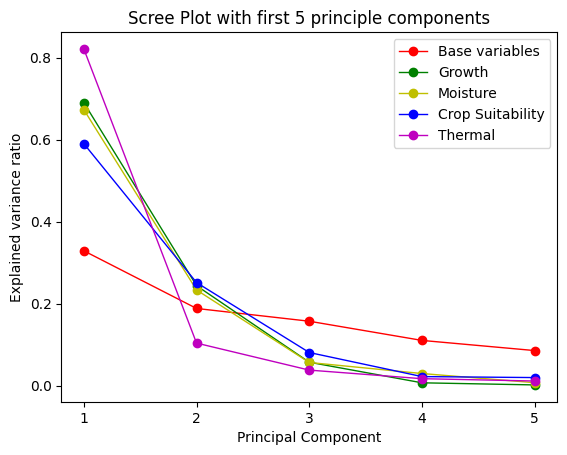

In [29]:
# Scree plotting with 5 PCs
n = 5
# Scree plot for X_sc
# plt.plot(range(1,n+1), all_pca_exp_var[0][0:n], 'co-', linewidth=1, label='All X variables')
# Scree plot for X_base_sc
plt.plot(range(1,n+1), all_pca_exp_var[1][0:n], 'ro-', linewidth=1, label='Base variables')
# Scree plot for X_growth_sc
plt.plot(range(1,n+1), all_pca_exp_var[2][0:n], 
        'go-', linewidth=1, label='Growth')
# Scree plot for X_moist_sc
plt.plot(range(1,n+1), all_pca_exp_var[3][0:n], 
         'yo-', linewidth=1, label='Moisture')
# Scree plot for X_crop_suit_sc
plt.plot(range(1,n+1), all_pca_exp_var[4][0:n], 'bo-', linewidth=1, label='Crop Suitability')
# Scree plot for X_thermal_sc
plt.plot(range(1,n+1), all_pca_exp_var[5][0:n], 'mo-', linewidth=1, label='Thermal')
plt.title('Scree Plot with first 5 principle components')
plt.xticks([1,2,3,4,5])
plt.xlabel('Principal Component')
plt.ylabel('Explained variance ratio')
plt.legend()
plt.savefig('output/screeplot.png')

In [30]:
all_pca_exp_var

[array([4.29201051e-01, 2.05655323e-01, 8.07691405e-02, 6.08984135e-02,
        3.87995521e-02, 3.65356143e-02, 2.41720592e-02, 2.08840761e-02,
        1.70205544e-02, 1.23286596e-02, 9.59394812e-03, 9.12049100e-03,
        8.01265595e-03, 7.00459968e-03, 5.48894031e-03, 5.40754428e-03,
        4.81848100e-03, 3.85723263e-03, 3.41823032e-03, 2.75427538e-03,
        2.01389456e-03, 1.87444056e-03, 1.42905871e-03, 1.39121032e-03,
        1.07325179e-03, 9.60766860e-04, 8.85285373e-04, 7.98752820e-04,
        7.19687044e-04, 6.79839882e-04, 5.06161611e-04, 4.10903067e-04,
        3.82742460e-04, 3.08108201e-04, 2.78749833e-04, 1.61237360e-04,
        1.39155938e-04, 9.46936430e-05, 6.84950679e-05, 4.16957866e-05,
        2.77089365e-05, 8.54298083e-06, 4.45992823e-06, 3.14994543e-07]),
 array([0.32887353, 0.18828112, 0.15715518, 0.11034371, 0.08557981,
        0.06678882, 0.04407945, 0.01889838]),
 array([0.69019592, 0.24384539, 0.05715688, 0.00697555, 0.00182626]),
 array([6.73110090e-01

##### 2.3 Run Poisson regression on PCA and without PCA

In [45]:
## Convert normalized x values to dataframe
# PC1 dataframe

In [46]:
len(all_pca_transformed[0])
all_pca_transformed[0]

array([[-6.45895813e-02, -5.05654918e+00,  1.02790804e-03, ...,
        -7.71002493e-04,  3.02677958e-03,  5.89435803e-04],
       [ 7.64276078e-03, -4.45086112e+00, -3.19579958e-01, ...,
        -4.88430710e-03,  6.63892927e-03, -4.34925481e-03],
       [ 2.82971393e-03, -4.43320952e+00, -6.65192528e-02, ...,
        -1.65025039e-03,  6.61358240e-03, -5.42803563e-03],
       ...,
       [ 2.27447010e+00,  2.51343660e+00, -9.13684342e-02, ...,
        -1.22266251e-02, -4.57873513e-03, -1.25159188e-02],
       [ 2.71048055e+00,  2.13782067e+00, -1.56484472e+00, ...,
        -6.09950520e-04, -6.52422516e-03, -1.05943630e-02],
       [ 2.33231903e+00,  1.38136745e+00, -1.27370297e+00, ...,
         2.86943344e-03,  1.05738968e-02, -7.55566801e-03]])

In [47]:
obs = len(all_pca_transformed[0])

# Create PCA1 dataframe for 6 condensed x variables
PCA1_lst = [[],[],[],[],[],[]]

for i in range(0,6):
    for r in range(0,obs):
        PCA1_lst[i].append(all_pca_transformed[i][r][0])


np_PCA1 = np.array(PCA1_lst)
df_PCA1 = pd.DataFrame(data=np_PCA1.T, 
               index=np.arange(len(np_PCA1.T)), 
               columns=['All X variables','Base Variables','Growth','Moisture',
                        'Crop Suitability','Thermal'])
df_PCA1

# Create PCA2 dataframe for 6 condensed x variables
PCA2_lst = [[],[],[],[],[],[]]

for i in range(0,6):
    for r in range(0,obs):
        PCA2_lst[i].append(all_pca_transformed[i][r][1])


np_PCA2 = np.array(PCA2_lst)
df_PCA2 = pd.DataFrame(data=np_PCA2.T, 
               index=np.arange(len(np_PCA2.T)), 
               columns=['All X variables','Base Variables','Growth','Moisture',
                        'Crop Suitability','Thermal'])
df_PCA2

,All X variables,Base Variables,Growth,Moisture,Crop Suitability,Thermal
0,-5.056549,-0.519827,2.298356,0.792270,-0.194117,1.076588
1,-4.450861,-0.539450,2.230400,0.765473,0.115853,0.639405
2,-4.433210,-0.544481,2.247684,0.776703,-0.200305,0.591799
3,-4.378182,-0.469359,2.276170,0.831358,0.094562,0.575628
4,-5.728421,-0.257768,1.929063,0.903748,-0.822057,1.121047
...,...,...,...,...,...,...
237031,1.012396,2.128672,-0.288490,-0.417110,-0.282402,-0.443119
237032,1.054719,1.401114,-0.169453,-0.389202,0.480429,-0.491964
237033,2.513437,2.501037,0.990228,0.147054,0.420112,-0.887219
237034,2.137821,1.421874,0.890981,0.007886,1.484317,-0.918523


In [48]:
base_y = grow_df.iloc[:,:27]
base_y.columns

Index(['iso3', 'early_urban', 'x', 'y', 'nat_id', 'subnat_id', 'layer',
       'growing_period', 'landsuit', 'ruggedness', 'precip', 'temperature',
       'dist_sea', 'elevation', 'coastal', 'malaria', 'pop_dens_gpw',
       'land_area_gpw', 'pop_count_ghs', 'pop_count_ls', 'pop_dens_ghs',
       'pop_dens_ls', 'latitude', 'harbor25', 'river25', 'lake25',
       'continent'],
      dtype='object')

In [49]:
# Concactanate df with baseline measurements and y
base_y = grow_df.iloc[:,:27]
PCA1 = pd.concat([base_y, df_PCA1], axis=1, join="outer")
PCA1 = PCA1.dropna(subset=['pop_dens_ghs'])
PCA1 = PCA1.reset_index()

PCA2 = pd.concat([base_y, df_PCA2], axis=1, join="outer")
PCA2 = PCA2.dropna(subset=['pop_dens_ghs'])
PCA2 = PCA2.reset_index()

In [50]:
# Generate dummy controls
from sklearn.preprocessing import LabelBinarizer
PCA1_dum = PCA1.copy()
label_binarizer = LabelBinarizer()
label_binarizer_output = label_binarizer.fit_transform(PCA1_dum['nat_id'])
PCA_dum = pd.DataFrame(label_binarizer_output,
                         columns = label_binarizer.classes_)
PCA_dum

,Afghanistan,Albania,Algeria,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,Bangladesh,...,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237018,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
237019,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
237020,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
237021,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
## Concat df with dummies
PCA1_with_d = pd.concat([PCA1, PCA_dum], axis=1)
PCA2_with_d = pd.concat([PCA2, PCA_dum], axis=1)

In [52]:
base_y.columns

Index(['iso3', 'early_urban', 'x', 'y', 'nat_id', 'subnat_id', 'layer',
       'growing_period', 'landsuit', 'ruggedness', 'precip', 'temperature',
       'dist_sea', 'elevation', 'coastal', 'malaria', 'pop_dens_gpw',
       'land_area_gpw', 'pop_count_ghs', 'pop_count_ls', 'pop_dens_ghs',
       'pop_dens_ls', 'latitude', 'harbor25', 'river25', 'lake25',
       'continent'],
      dtype='object')

In [53]:
## Concat df for all 44 x variables, standardizing
X_44_wfe = pd.concat([X_base, X_growth, X_crop_suit, 
            X_moist, X_thermal], axis=1)

X_44_wfe_std = (X_44_wfe - X_44_wfe.mean())/X_44_wfe.std()
# PCA1 = pd.concat([base_y, df_PCA1], axis=1, join="outer")
# PCA1 = PCA1.dropna(subset=['pop_dens_ghs'])
# PCA1 = PCA1.reset_index()
all_wfe_std = pd.concat([base_y['pop_dens_ghs'], X_44_wfe_std], axis=1,join='outer')
all_wfe_std = all_wfe_std.dropna(subset=['pop_dens_ghs'])
all_wfe_std = all_wfe_std.reset_index()

all_fe_std = pd.concat([all_wfe_std, PCA_dum], axis=1)

## The standardize df for all X variables (dropping nan population values)
X_44_std = all_wfe_std.iloc[:,2:]
X_44_fe_std = pd.concat([X_44_std, PCA_dum], axis=1)


In [54]:
## Run Poisson fit for PCA1

# Define Poissson regressors

pop_den = PCA1['pop_dens_ghs']
X_all = PCA1['All X variables']
X_basevar = PCA1['Base Variables']
X_subvar = PCA1[['Base Variables','Growth','Moisture','Crop Suitability','Thermal']]
country_fe = PCA1_with_d.iloc[:,34:]

# Define specification models
specs = {}
# spec 1: with FE, PCA1
specs['spec1'] = sm.add_constant(pd.concat([X_subvar, country_fe], axis=1))
# spec 2: without FE, PCA1
specs['spec2'] = sm.add_constant(X_subvar)
# spec 3: with FE, all variables standarized
specs['spec3'] = sm.add_constant(X_44_fe_std)
# spec 3: without FE, all variables standarized
specs['spec4'] = sm.add_constant(X_44_std)


In [71]:
## Run Poisson Reg using scikit-learn
from sklearn import linear_model
# Spec 1: With country fixed effects
clf = linear_model.PoissonRegressor(solver='lbfgs', max_iter=1000)
X = specs['spec1'].iloc[:,1:]
y = pop_den

clf.fit(X, y)
gof_spec1 = clf.score(X,y)
coef_spec1 = clf.coef_[:5]
print("The Percentage of Deviance Explained, with country FE, PCA1")
print(gof_spec1)
print("Poisson Coefficients for PCA1, with country FE, PCA1")
print(coef_spec1)

# Spec 2: Without country fixed effects
clf = linear_model.PoissonRegressor(solver='lbfgs', max_iter=1000)
X = specs['spec2'].iloc[:,1:]
y = pop_den

clf.fit(X, y)
gof_spec2 = clf.score(X,y)
coef_spec2 = clf.coef_
print("The Percentage of Deviance Explained, without country FE, PCA1")
print(gof_spec2)
print("Poisson Coefficients for PCA1, without country FE, PCA1")
print(coef_spec2)

The Percentage of Deviance Explained, with country FE, PCA1
0.33879195257977524
Poisson Coefficients for PCA1, with country FE, PCA1
[ 0.48009811  0.00292816 -0.0637018   0.0165361  -0.03888612]
The Percentage of Deviance Explained, without country FE, PCA1
0.1444060859389833
Poisson Coefficients for PCA1, without country FE, PCA1
[ 0.43104573  0.04936258 -0.01238262  0.0196281  -0.05474997]


In [73]:

# Spec 3: With country fixed effects, normalizing on all 44 variables
clf = linear_model.PoissonRegressor(solver='lbfgs', max_iter=1000)
X = specs['spec3'].iloc[:,1:]
y = pop_den

clf.fit(X, y)
gof_spec3 = clf.score(X,y)
coef_spec3 = clf.coef_[:44]
print("The Percentage of Deviance Explained, with country FE, for 44 normalized variables")
print(gof_spec3)
print("Poisson Coefficients, with country FE, for 44 normalized variables")
print(coef_spec3)

# Spec 4: Without country fixed effects, normalizing on all 44 variables
clf = linear_model.PoissonRegressor(solver='lbfgs', max_iter=1000)
X = specs['spec4'].iloc[:,1:]
y = pop_den

clf.fit(X, y)
gof_spec4 = clf.score(X,y)
coef_spec4 = clf.coef_
print("The Percentage of Deviance Explained, without country FE, for 44 normalized variables")
print(gof_spec4)
print("Poisson Coefficients, without country FE, for 44 normalized variables")
print(coef_spec4)

The Percentage of Deviance Explained, with country FE, for 44 normalized variables
0.46046498223759014
Poisson Coefficients, with country FE, for 44 normalized variables
[ 0.25561121  0.22414845 -0.03474709 -0.02767874  0.07784911 -0.49628398
 -0.28536947 -0.15038823  0.36105496 -0.12336571  0.0826875  -0.33069167
 -0.23159782  0.05611768  0.12141188 -0.25006576 -0.08968642  0.14422717
  0.10429202  0.06061646  0.24634491  0.05358297  0.18954812 -0.29049486
 -0.38436151  0.01187865  0.12883117  0.36997187 -0.38729378 -0.0083584
 -0.09846435 -0.00121631 -0.12456398 -0.13376805  0.16496899 -0.03475831
 -0.02138171  0.48882101 -0.3211927  -0.1163783   0.1088616   0.09883013
 -0.4922238  -0.49533846]
The Percentage of Deviance Explained, without country FE, for 44 normalized variables
0.3886869072904371
Poisson Coefficients, without country FE, for 44 normalized variables
[ 0.45497051  0.30613414  0.01705261 -0.04081991  0.19599936 -0.54251317
 -0.19913042 -0.1900546   0.45711352 -0.186175

In [70]:
len(coef_spec4)

44

In [62]:
clf.get_params()

{'alpha': 1.0,
 'fit_intercept': True,
 'max_iter': 100,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [76]:
## Run Poisson Reg using statsmodels GLM module
Pois_specs = {key:sm.GLM(pop_den, specs[key], family=sm.families.Poisson()).fit()
              for key in specs.keys()}

Pois_spec1_as_html = Pois_specs['spec1'].summary().tables[1].as_html()
pois_table_PCA_fe = pd.read_html(Pois_spec1_as_html, header=0, index_col=0)[0]

Pois_spec2_as_html = Pois_specs['spec2'].summary().tables[1].as_html()
pois_table_PCA_wfe = pd.read_html(Pois_spec2_as_html, header=0, index_col=0)[0]

Pois_spec3_as_html = Pois_specs['spec3'].summary().tables[1].as_html()
pois_table_44_fe = pd.read_html(Pois_spec3_as_html, header=0, index_col=0)[0]

Pois_spec4_as_html = Pois_specs['spec4'].summary().tables[1].as_html()
pois_table_44_wfe = pd.read_html(Pois_spec4_as_html, header=0, index_col=0)[0]

In [77]:
Pois_specs['spec1'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           pop_dens_ghs   No. Observations:               237023
Model:                            GLM   Df Residuals:                   236854
Model Family:                 Poisson   Df Model:                          168
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.8917e+07
Date:                Sun, 26 Mar 2023   Deviance:                   3.7309e+07
Time:                        17:06:40   Pearson chi2:                 4.73e+08
No. Iterations:                     9   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                3.3333      0.001   3004.711      0.000       3.331       3.335
Base Variables                       0.4790      0.001    779.102      0.000       0.478       0.480
Growth                              -0.0197      0.000    -48.007      0.000      -0.020      -0.019
Moisture                            -0.0746      0.000   -417.164      0.000      -0.075      -0.074
Crop Suitability                     0.1003      0.000    568.554      0.000       0.100       0.101
Thermal                             -0.1389      0.000   -417.520      0.000      -0.140      -0.138
Afghanistan                          1.1885      0.005    260.453      0.000       1.180       1.197
Albania                              0.7358      0.012     60.274      0.000       0.712       0.760
Algeria                              0.0057      0.004      1.582      0.114      -0.001       0.013
Angola                              -1.3616      0.005   -282.772      0.000      -1.371      -1.352
Argentina                           -1.2858      0.004   -357.062      0.000      -1.293      -1.279
Armenia                              1.8274      0.014    134.792      0.000       1.801       1.854
Australia                           -2.2545      0.004   -536.006      0.000      -2.263      -2.246
Austria                              1.3689      0.008    171.264      0.000       1.353       1.385
Azerbaijan                           1.3532      0.007    185.448      0.000       1.339       1.367
Bangladesh                           1.3993      0.002    572.333      0.000       1.394       1.404
Belarus                              0.3965      0.007     56.573      0.000       0.383       0.410
Belgium                              2.0123      0.007    309.379      0.000       2.000       2.025
Belize                              -1.7202      0.022    -79.979      0.000      -1.762      -1.678
Benin                               -1.2202      0.007   -167.355      0.000      -1.235      -1.206
Bhutan                              -0.0289      0.024     -1.187      0.235      -0.077       0.019
Bolivia                             -2.7489      0.008   -330.579      0.000      -2.765      -2.733
Bosnia and Herzegovina               0.5275      0.012     43.907      0.000       0.504       0.551
Botswana                            -2.2478      0.017   -128.915      0.000      -2.282      -2.214
Brazil                              -1.7826      0.002   -896.038      0.000      -1.786      -1.779
Brunei                              -1.1204      0.027    -41.310      0.000      -1.174      -1.067
Bulgaria                             0.4882      0.009     55.326      0.000       0.471       0.505
Burkina Faso                        -1.5313      0.00

In [90]:
pois_table_PCA_fe.iloc[:6,:].to_latex('output/latex_tables/PCA_reg.tex')
print(pois_table_PCA_fe.iloc[:6,:].to_latex())

\begin{tabular}{lrrrrrr}
\toprule
{} &    coef &  std err &         z &  P>|z| &  [0.025 &  0.975] \\
\midrule
const            &  3.3333 &    0.001 &  3004.711 &    0.0 &   3.331 &   3.335 \\
Base Variables   &  0.4790 &    0.001 &   779.102 &    0.0 &   0.478 &   0.480 \\
Growth           & -0.0197 &    0.000 &   -48.007 &    0.0 &  -0.020 &  -0.019 \\
Moisture         & -0.0746 &    0.000 &  -417.164 &    0.0 &  -0.075 &  -0.074 \\
Crop Suitability &  0.1003 &    0.000 &   568.554 &    0.0 &   0.100 &   0.101 \\
Thermal          & -0.1389 &    0.000 &  -417.520 &    0.0 &  -0.140 &  -0.138 \\
\bottomrule
\end{tabular}



C:\Users\Lisa\AppData\Local\Temp\ipykernel_7756\3534539868.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  pois_table_PCA_fe.iloc[:6,:].to_latex('output/latex_tables/PCA_reg.tex')
C:\Users\Lisa\AppData\Local\Temp\ipykernel_7756\3534539868.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(pois_table_PCA_fe.iloc[:6,:].to_latex())


In [ ]:
Pois_specs['spec2'].summary()

In [ ]:
country_fe.isna().sum()

In [279]:
poisson_training_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           pop_dens_ghs   No. Observations:               237023
Model:                            GLM   Df Residuals:                   237019
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -4.6714e+07
Date:                Sun, 12 Mar 2023   Deviance:                   9.2902e+07
Time:                        00:51:05   Pearson chi2:                 3.60e+10
No. Iterations:                    12   Pseudo R-squ. (CS):         -5.786e+48
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Growth              -0.3063      0.000  -1213.580      0.000      -0.307      -0.306
Moisture             0.0197      0.000    119.102      0.000       0.019       0.020
Crop Suitability     0.0367      0.000    230.612      0.000       0.036       0.037
Thermal             -1.0113      0.000  -6434.831      0.000      -1.012      -1.011
====================================================================================
"""

In [260]:
## Our fitted Poisson
Pois_specs = {key:sm.GLM(pop_den, specs[key], family=sm.families.Poisson()).fit()
              for key in specs.keys()}

ValueError: The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.

In [161]:
sm.GLM(pop_den, X_subvar, family=sm.families.Poisson()).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           pop_dens_ghs   No. Observations:               237023
Model:                            GLM   Df Residuals:                   237018
Model Family:                 Poisson   Df Model:                            4
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -4.6191e+07
Date:                Wed, 22 Mar 2023   Deviance:                   9.1856e+07
Time:                        02:19:02   Pearson chi2:                 3.17e+10
No. Iterations:                    13   Pseudo R-squ. (CS):         -7.006e+46
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Base Variables       0.5381      0.001   1047.988      0.000       0.537       0.539
Growth              -0.1028      0.000   -306.573      0.000      -0.103      -0.102
Moisture            -0.0550      0.000   -248.051      0.000      -0.055      -0.055
Crop Suitability     0.0017      0.000     10.113      0.000       0.001       0.002
Thermal             -0.8385      0.000  -3454.565      0.000      -0.839      -0.838
====================================================================================
"""

## 3. Neural Network

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.metrics import accuracy_score
%matplotlib inline

In [52]:
# Import histrical datset (cleaned from Part 1)
hist = pd.read_csv('data/hist_clean.csv')
# Group variables
base = ['x', 'y', 'layer', 'growing_period', 'landsuit', 'ruggedness', 'precip',
       'temperature', 'dist_sea', 'elevation', 'coastal', 'malaria',
       'pop_dens_gpw', 'land_area_gpw', 'pop_count_ghs', 'pop_count_ls',
       'pop_dens_ghs', 'pop_dens_ls', 'latitude', 'harbor25', 'river25',
       'lake25']
grow = ['adjusted_LGP_days', 'length_longest_comp',
       'longest_consec_dry', 'num_dry_days', 'total_grow_period_days']
moist = ['annual_ppet_ratio', 'num_consec_days_prp>30', 'num_rain_days',
       'fournier_index', 'annual_prp', 'max_sum_consec_days_prp>30']
crop = ['banana', 'cassava', 'maize', 'dryland_rice', 'wetland_rice', 'soybean',
       'sweet_potato', 'sorghum', 'wheat', 'white_potato', 'yam']
thermal = ['days_tmax>35', 'days_tmax>40', 'days_tmin<0', 'days_tmin<10',
       'days_tmin<15', 'days_tavg>10', 'days_tavg>5', 'mean_annual_temp',
       'snow_adj_temp', 'coolest_month_temp', 'annual_sum_temp>10',
       'annual_sum_temp>5', 'num_air_frost', 'num_air_frost_snow_adj']

C:\Users\Lisa\AppData\Local\Temp\ipykernel_6644\3441491952.py:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  hist = pd.read_csv('data/hist_clean.csv')


##### 3.1 Train and test split

Start with example of only using growth variables as X

In [93]:
# Name X and Y variables
X = np.asarray(hist[grow])
y = np.asarray(hist['pop_dens_ghs']).T
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1680)

In [94]:
# Normalize the data
sc=StandardScaler()
scaler = sc.fit(X_train)
trainX_scaled = scaler.transform(X_train)
testX_scaled = scaler.transform(X_test)

In [95]:
trainX_scaled

array([[-0.27138309, -0.59935168, -0.51459005, -0.64912988, -0.24335004],
       [-0.24042963, -0.40824419, -0.24022638,  1.01595654, -0.21528476],
       [-1.17584301, -0.94406438, -0.51663754, -1.13737618, -1.00059296],
       ...,
       [-0.55244045, -0.42673846, -0.46135531, -0.82315826, -0.54271306],
       [ 0.09139139,  0.10754054, -0.53506495, -0.89405872,  0.06328917],
       [-0.60072784, -0.46680939, -0.28731865, -0.7608518 , -0.5302396 ]])

In [96]:
# Print parameters
print ("Number of training examples: m_train = " + str(trainX_scaled.shape[0]))
print ("Number of testing examples: m_test = " + str(testX_scaled.shape[0]))
print ("Number of features for each observation = " + str(trainX_scaled.shape[1]))
print ("X_train shape: " + str(trainX_scaled.shape))
print ("y_train shape: " + str(y_train.shape))
print ("X_test shape: " + str(testX_scaled.shape))
print ("y_test shape: " + str(y_test.shape))

Number of training examples: m_train = 189618
Number of testing examples: m_test = 47405
Number of features for each observation = 5
X_train shape: (189618, 5)
y_train shape: (189618,)
X_test shape: (47405, 5)
y_test shape: (47405,)


In [91]:
# scaler = StandardScaler() #Control for scale of inputs
# scaler.fit(X_train)
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)
# X_train, y_train, X_test, y_test = X_train.T, y_train.T, X_test.T, y_test.T

In [54]:
hist.columns

Index(['Unnamed: 0', 'iso3', 'early_urban', 'x', 'y', 'nat_id', 'subnat_id',
       'layer', 'growing_period', 'landsuit', 'ruggedness', 'precip',
       'temperature', 'dist_sea', 'elevation', 'coastal', 'malaria',
       'pop_dens_gpw', 'land_area_gpw', 'pop_count_ghs', 'pop_count_ls',
       'pop_dens_ghs', 'pop_dens_ls', 'latitude', 'harbor25', 'river25',
       'lake25', 'continent', 'adjusted_LGP_days', 'length_longest_comp',
       'longest_consec_dry', 'num_dry_days', 'total_grow_period_days',
       'annual_ppet_ratio', 'num_consec_days_prp>30', 'num_rain_days',
       'fournier_index', 'annual_prp', 'max_sum_consec_days_prp>30', 'banana',
       'cassava', 'maize', 'dryland_rice', 'wetland_rice', 'soybean',
       'sweet_potato', 'sorghum', 'wheat', 'white_potato', 'yam',
       'days_tmax>35', 'days_tmax>40', 'days_tmin<0', 'days_tmin<10',
       'days_tmin<15', 'days_tavg>10', 'days_tavg>5', 'mean_annual_temp',
       'snow_adj_temp', 'coolest_month_temp', 'annual_sum_temp>

##### 3.2 Build neural network with MLPregressor

C:\Users\Lisa\anaconda3\envs\mlta\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


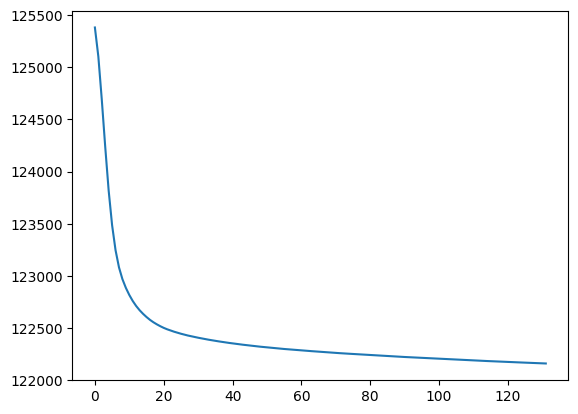

In [106]:
MLP_reg = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', random_state=1680,
                       max_iter=200, learning_rate_init=0.0001)

MLP_reg.fit(trainX_scaled, np.ravel(y_train)) #estimate params
# print(accuracy_score(y_train, MLP_reg.predict(trainX_scaled))) # within sample accuracy
# print(accuracy_score(y_test, MLP_reg.predict(testX_scaled))) # out of sample accuracy
plt.plot(MLP_reg.loss_curve_)

In [108]:
y_pred = MLP_reg.predict(testX_scaled)

In [110]:
y_pred.shape

(47405,)

In [112]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 77.70538210760742


In [115]:
print(validation_scores_(y_test,y_pred))

NameError: name 'validation_scores_' is not defined

## 4. Lasso Regression

##### 4.1 Create cleaned variable specifications

I use the variable specifications from Section 2: PCA. There are 4 sets of variables in the historical dataset: 
1. Baseline variables
2. Growth variables
3. Moist variables
4. Crop Suitability variables
5. Thermal variables

Let's first load the variables and obtain their column names:

In [91]:
## Load cleaned dataset that has dropped NaN y values
hist_clean = pd.read_csv("data\hist_clean.csv")
print(hist_clean.columns)
hist_clean

C:\Users\Lisa\AppData\Local\Temp\ipykernel_7756\1488284204.py:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  hist_clean = pd.read_csv("data\hist_clean.csv")


Index(['Unnamed: 0', 'iso3', 'early_urban', 'x', 'y', 'nat_id', 'subnat_id',
       'layer', 'growing_period', 'landsuit', 'ruggedness', 'precip',
       'temperature', 'dist_sea', 'elevation', 'coastal', 'malaria',
       'pop_dens_gpw', 'land_area_gpw', 'pop_count_ghs', 'pop_count_ls',
       'pop_dens_ghs', 'pop_dens_ls', 'latitude', 'harbor25', 'river25',
       'lake25', 'continent', 'adjusted_LGP_days', 'length_longest_comp',
       'longest_consec_dry', 'num_dry_days', 'total_grow_period_days',
       'annual_ppet_ratio', 'num_consec_days_prp>30', 'num_rain_days',
       'fournier_index', 'annual_prp', 'max_sum_consec_days_prp>30', 'banana',
       'cassava', 'maize', 'dryland_rice', 'wetland_rice', 'soybean',
       'sweet_potato', 'sorghum', 'wheat', 'white_potato', 'yam',
       'days_tmax>35', 'days_tmax>40', 'days_tmin<0', 'days_tmin<10',
       'days_tmin<15', 'days_tavg>10', 'days_tavg>5', 'mean_annual_temp',
       'snow_adj_temp', 'coolest_month_temp', 'annual_sum_temp>

,Unnamed: 0,iso3,early_urban,x,y,nat_id,subnat_id,layer,growing_period,landsuit,...,days_tmin<15,days_tavg>10,days_tavg>5,mean_annual_temp,snow_adj_temp,coolest_month_temp,annual_sum_temp>10,annual_sum_temp>5,num_air_frost,num_air_frost_snow_adj
0,0,AFG,False,60.625,33.125,Afghanistan,AFG.7_1,1.057659e+06,40.555556,0.004000,...,216.666667,288.222222,365.000000,19.723333,669.555556,669.555556,6602.111111,7198.222222,0.000000,0.000000
1,1,AFG,False,60.625,33.625,Afghanistan,AFG.12_1,1.061248e+06,53.333333,0.007000,...,221.222222,282.333333,365.000000,19.303333,622.666667,622.666667,6430.000000,7044.666667,0.000000,0.000000
2,2,AFG,False,60.625,33.875,Afghanistan,AFG.12_1,1.064223e+06,69.666667,0.007000,...,222.444444,281.222222,365.000000,19.204444,611.777778,611.777778,6392.555556,7009.222222,0.000000,0.000000
3,3,AFG,False,60.625,34.125,Afghanistan,AFG.12_1,1.067975e+06,78.666667,0.020000,...,224.444444,280.444444,365.000000,19.111111,603.333333,603.333333,6358.444444,6975.444444,0.000000,0.000000
4,4,AFG,False,60.875,31.625,Afghanistan,AFG.7_1,1.088254e+06,27.888889,0.005000,...,212.888889,296.222222,365.000000,20.084444,716.444444,716.444444,6773.777778,7330.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237018,237031,SRB,NaN,22.625,43.375,Serbia,SRB.23_1,5.252321e+04,138.000000,0.806000,...,363.666667,158.222222,212.444444,7.517778,-205.888889,-379.888889,2452.555556,2861.000000,0.222346,0.206724
237019,237032,SRB,NaN,22.875,43.125,Serbia,SRB.12_1,7.838075e+04,145.666667,0.806000,...,357.666667,166.888889,221.666667,8.311111,-193.777778,-290.555556,2662.444444,3074.444444,0.186518,0.178935
237020,237033,MNE,NaN,18.875,42.125,Montenegro,MNE.6_1,3.546892e+05,288.333333,0.886000,...,273.666667,230.666667,335.333333,13.953333,443.333333,443.333333,4266.333333,4999.000000,0.000000,0.000000
237021,237034,MNE,NaN,19.125,41.875,Montenegro,MNE.2_1,3.506572e+05,297.333333,0.886000,...,266.000000,243.666667,348.000000,14.853333,524.333333,524.333333,4603.000000,5338.333333,0.000000,0.000000


In [92]:
## Obatin and name different X, and our y
X_base_cl = hist_clean[['growing_period', 'landsuit', 'ruggedness', 'precip',
       'temperature', 'dist_sea', 'elevation', 'malaria']]
X_growth_cl = hist_clean[['adjusted_LGP_days', 'length_longest_comp', 'longest_consec_dry',
       'num_dry_days', 'total_grow_period_days']]
X_moist_cl = hist_clean[['annual_ppet_ratio',
       'num_consec_days_prp>30', 'num_rain_days', 'fournier_index',
       'annual_prp', 'max_sum_consec_days_prp>30']]
X_crop_suit_cl = hist_clean[['banana', 'cassava',
       'maize', 'dryland_rice', 'wetland_rice', 'soybean', 'sweet_potato',
       'sorghum', 'wheat', 'white_potato', 'yam']]
X_thermal_cl = hist_clean[['days_tmax>35',
       'days_tmax>40', 'days_tmin<0', 'days_tmin<10', 'days_tmin<15',
       'days_tavg>10', 'days_tavg>5', 'mean_annual_temp', 'snow_adj_temp',
       'coolest_month_temp', 'annual_sum_temp>10', 'annual_sum_temp>5',
       'num_air_frost', 'num_air_frost_snow_adj']]
X_cl = pd.concat([X_base_cl, X_growth_cl, X_moist_cl, X_crop_suit_cl, 
                  X_thermal_cl], axis="columns")

y_cl = hist_clean['pop_dens_ghs']

In [93]:
X_growth_cl

,adjusted_LGP_days,length_longest_comp,longest_consec_dry,num_dry_days,total_grow_period_days
0,73.555556,58.555556,195.000000,306.000000,73.555556
1,98.666667,90.444444,173.000000,300.111111,98.666667
2,100.333333,91.777778,173.000000,300.888889,100.333333
3,100.111111,90.888889,173.000000,306.222222,100.111111
4,26.333333,0.000000,193.000000,322.666667,12.555556
...,...,...,...,...,...
237018,189.444444,135.000000,8.888889,92.222222,189.444444
237019,199.888889,143.111111,9.222222,98.111111,200.444444
237020,291.000000,252.333333,10.000000,159.666667,291.000000
237021,282.000000,197.666667,10.000000,173.333333,285.333333


In [94]:
len(X_thermal_cl.columns)

14

In [95]:
X_cl

,growing_period,landsuit,ruggedness,precip,temperature,dist_sea,elevation,malaria,adjusted_LGP_days,length_longest_comp,...,days_tmin<15,days_tavg>10,days_tavg>5,mean_annual_temp,snow_adj_temp,coolest_month_temp,annual_sum_temp>10,annual_sum_temp>5,num_air_frost,num_air_frost_snow_adj
0,40.555556,0.004000,41214.875000,0.428226,18.563611,768563.5625,781.700012,0.111959,73.555556,58.555556,...,216.666667,288.222222,365.000000,19.723333,669.555556,669.555556,6602.111111,7198.222222,0.000000,0.000000
1,53.333333,0.007000,41025.343750,0.545968,18.019722,816539.0000,685.924438,0.103586,98.666667,90.444444,...,221.222222,282.333333,365.000000,19.303333,622.666667,622.666667,6430.000000,7044.666667,0.000000,0.000000
2,69.666667,0.007000,38227.828125,0.545968,18.019722,840871.5000,644.403320,0.103586,100.333333,91.777778,...,222.444444,281.222222,365.000000,19.204444,611.777778,611.777778,6392.555556,7009.222222,0.000000,0.000000
3,78.666667,0.020000,40167.843750,0.621505,17.188055,865408.2500,670.586670,0.090497,100.111111,90.888889,...,224.444444,280.444444,365.000000,19.111111,603.333333,603.333333,6358.444444,6975.444444,0.000000,0.000000
4,27.888889,0.005000,97272.710938,0.249194,18.558611,647186.7500,866.786682,0.105651,26.333333,0.000000,...,212.888889,296.222222,365.000000,20.084444,716.444444,716.444444,6773.777778,7330.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237018,138.000000,0.806000,397800.500000,2.046505,8.169722,314364.1875,1010.840027,0.000054,189.444444,135.000000,...,363.666667,158.222222,212.444444,7.517778,-205.888889,-379.888889,2452.555556,2861.000000,0.222346,0.206724
237019,145.666667,0.806000,262345.812500,2.046505,8.169722,288910.3750,957.755554,0.000054,199.888889,143.111111,...,357.666667,166.888889,221.666667,8.311111,-193.777778,-290.555556,2662.444444,3074.444444,0.186518,0.178935
237020,288.333333,0.886000,423750.500000,6.143280,12.034722,0.0000,416.651672,0.000000,291.000000,252.333333,...,273.666667,230.666667,335.333333,13.953333,443.333333,443.333333,4266.333333,4999.000000,0.000000,0.000000
237021,297.333333,0.886000,244882.718750,6.143280,14.604445,0.0000,188.390915,0.000000,282.000000,197.666667,...,266.000000,243.666667,348.000000,14.853333,524.333333,524.333333,4603.000000,5338.333333,0.000000,0.000000


##### 4.2 Model and split-test

We run LASSO in the 10 following ways:
1. Enter **all X variables** (44 of them) into the LASSO regression, and see the comparative importance of the coefficients 
<br>

2. Enter **only continuous baseline variables** (8 of them) into the LASSO regression, and see the comparative importance of the coefficients
3. Enter **only growth** variables (5 of them) into the LASSO regression, and see the comparative importance of the coefficients
4. Enter **only moist** variables (6 of them) into the LASSO regression, and see the comparative importance of the coefficients
5. Enter **only crop-suit** variables (11 of them) into the LASSO regression, and see the comparative importance of the coefficients
6. Enter **only thermal** variables (14 of them) into the LASSO regression, and see the comparative importance of the coefficients 
<br>

7. Enter **continuous baseline variables + growth** variables (13 of them) into the LASSO regression, see what gets dropped
8. Enter **continuous baseline variables + moist** variables (14 of them) into the LASSO regression, see what gets dropped
9. Enter **continuous baseline variables + crop-suit** variables (19 of them) into the LASSO regression, see what gets dropped
10. Enter **continuous baseline variables + thermal** variables (22 of them) into the LASSO regression, see what gets dropped

In [96]:
## Define X variables for model 7-10
X7 = pd.concat([X_base_cl, X_growth_cl], axis="columns")
X8 = pd.concat([X_base_cl, X_moist_cl], axis="columns")
X9 = pd.concat([X_base_cl, X_crop_suit_cl], axis="columns")
X10 = pd.concat([X_base_cl, X_thermal_cl], axis="columns")

In [97]:
## Splitting data to train and test, according to the 10 specifications above
X1_train, X1_test, y1_train, y1_test = train_test_split(X_cl, y_cl, test_size=0.1, random_state=1680)

X2_train, X2_test, y2_train, y2_test = train_test_split(X_base_cl, y_cl, test_size=0.1, random_state=1680)
X3_train, X3_test, y3_train, y3_test = train_test_split(X_growth_cl, y_cl, test_size=0.1, random_state=1680)
X4_train, X4_test, y4_train, y4_test = train_test_split(X_moist_cl, y_cl, test_size=0.1, random_state=1680)
X5_train, X5_test, y5_train, y5_test = train_test_split(X_crop_suit_cl, y_cl, test_size=0.1, random_state=1680)
X6_train, X6_test, y6_train, y6_test = train_test_split(X7, y_cl, test_size=0.1, random_state=1680)


X7_train, X7_test, y7_train, y7_test = train_test_split(X7, y_cl, test_size=0.1, random_state=1680)
X8_train, X8_test, y8_train, y8_test = train_test_split(X8, y_cl, test_size=0.1, random_state=1680)
X9_train, X9_test, y9_train, y9_test = train_test_split(X9, y_cl, test_size=0.1, random_state=1680)
X10_train, X10_test, y10_train, y10_test = train_test_split(X10, y_cl, test_size=0.1, random_state=1680)

In [98]:
X2_train.shape

(213320, 8)

##### 4.3 Run LASSO

In [100]:
## X1 and y
# Construct vector of alpha values
alphas = np.linspace(1e-6, 0.2, num=50)

# Construct vectors to store mean prediction errors and coefficients
cv_errs_lasso = []
coefs_lasso = []
MSE = 80000
bestalpha_lasso = 0.1

# Loop for running lasso regression for different values of alpha
for a in alphas:
    
    # define pipeline object
    lassoReg = make_pipeline(StandardScaler(with_mean=False), 
                             Lasso(alpha= a)) # Drop the scaling part
    # run lasso regression
    lassoReg.fit(X1_train, y1_train)
    # obtain predicted values of output
    y1_pred = lassoReg.predict(X1_test)
    # compute mean squared error
    cv_errs_lasso.append(mean_squared_error(y1_test, y1_pred))
    # store coefficients
    coefs_lasso.append(lassoReg['lasso'].coef_)
    
    # store value of alpha that minimizes the mean squared error
    if mean_squared_error(y1_test, y1_pred) < MSE: #np.mean((y_pred - y_test)**2)
        MSE = mean_squared_error(y1_test, y1_pred)
        bestalpha_lasso = a
        
print("optimal alpha:")        
print(bestalpha_lasso)

C:\Users\Lisa\anaconda3\envs\mlta\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.390e+10, tolerance: 4.958e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\Lisa\anaconda3\envs\mlta\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.235e+10, tolerance: 4.958e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\Lisa\anaconda3\envs\mlta\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duali

C:\Users\Lisa\anaconda3\envs\mlta\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.155e+09, tolerance: 4.958e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\Lisa\anaconda3\envs\mlta\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.784e+09, tolerance: 4.958e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\Lisa\anaconda3\envs\mlta\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duali

C:\Users\Lisa\anaconda3\envs\mlta\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.845e+07, tolerance: 4.958e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\Lisa\anaconda3\envs\mlta\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.114e+07, tolerance: 4.958e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\Lisa\anaconda3\envs\mlta\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duali

optimal alpha:
0.01632744897959184


C:\Users\Lisa\anaconda3\envs\mlta\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.347e+07, tolerance: 4.958e+06
  model = cd_fast.enet_coordinate_descent(


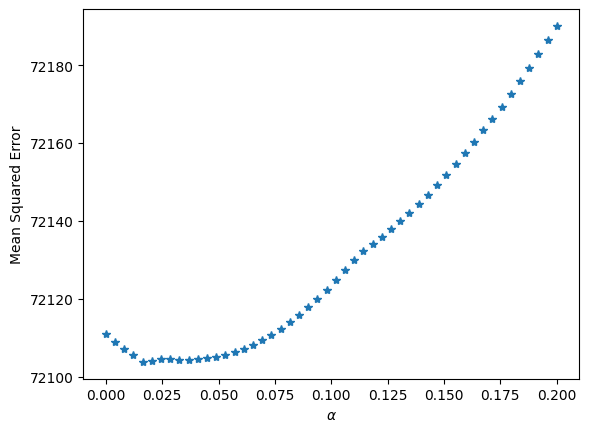

In [102]:
# Plot the MSE against the values of alphas
plt.plot(alphas, cv_errs_lasso, '*')
plt.xlabel(r'$\alpha$')
plt.ylabel('Mean Squared Error')
plt.savefig('penalty_mse.png')

In [58]:
len(coefs_lasso)

50

In [103]:
alphas[0:6]

array([1.00000000e-06, 4.08261224e-03, 8.16422449e-03, 1.22458367e-02,
       1.63274490e-02, 2.04090612e-02])

Text(0, 0.5, 'Lasso Regression Coefficients')

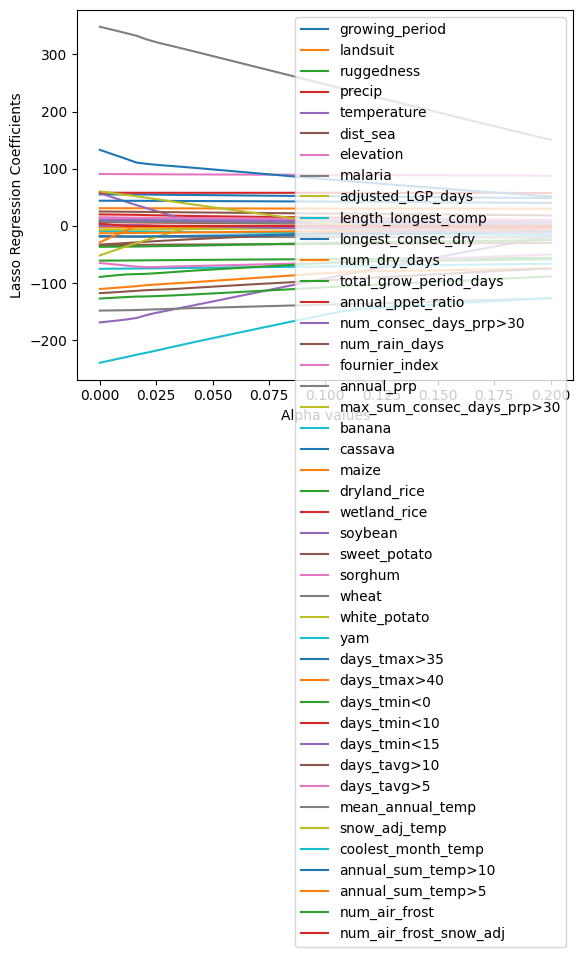

In [104]:
# Create dataframe for storing coefficients for only the 6 least MSE
coefs = pd.DataFrame(coefs_lasso, columns=X_cl.columns)
coefs_6 = coefs
coefs_6.set_index(alphas, inplace=True)
coefs_6.plot()
plt.xlabel('Alpha values')
plt.ylabel('Lasso Regression Coefficients')


In [68]:
coefs.iloc[:6,:]

,growing_period,landsuit,ruggedness,precip,temperature,dist_sea,elevation,malaria,adjusted_LGP_days,length_longest_comp,...,days_tmin<15,days_tavg>10,days_tavg>5,mean_annual_temp,snow_adj_temp,coolest_month_temp,annual_sum_temp>10,annual_sum_temp>5,num_air_frost,num_air_frost_snow_adj
0.000001,55.187175,30.980413,-1.105225,6.643696,-168.483246,-33.557691,14.922802,-18.902530,-2.049778,-9.210997,...,-0.27236,-117.327438,-64.907838,347.906014,60.185377,-238.85334,132.463016,-27.737569,-88.964667,4.076128
0.020409,0.000000,36.034512,-0.000000,0.000000,0.000000,-13.295574,-0.000000,-4.495417,0.000000,0.000000,...,-0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,-7.642968,-0.000000
0.040817,0.000000,32.828926,-0.000000,0.000000,0.000000,-5.198258,-0.000000,-0.000000,0.000000,0.000000,...,-0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,-3.084510,-0.000000
0.061225,0.000000,27.389231,-0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,...,-0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,-0.000000,-0.000000
0.081634,0.000000,21.115548,-0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,...,-0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,-0.000000,-0.000000
0.102042,0.000000,12.488684,-0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,...,-0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,-0.000000,-0.000000


In [108]:
# Run lasso regression with optimal alpha
op_alpha = 0.01632744897959184
lassoReg = make_pipeline(StandardScaler(with_mean=False), Lasso(alpha= op_alpha))
lassoReg.fit(X1_train, y1_train)

# Add coefficients to dataframe
df_results = pd.DataFrame({'Variable':X_cl.columns, 'Coeff LASSO_X1':lassoReg['lasso'].coef_, 
                         'Coeff Poisson':coef_spec3})
print(df_results)

                      Variable  Coeff LASSO_X1  Coeff Poisson
0               growing_period       55.086386       0.255611
1                     landsuit       30.948178       0.224148
2                   ruggedness       -1.236412      -0.034747
3                       precip        6.203225      -0.027679
4                  temperature     -160.905433       0.077849
5                     dist_sea      -33.055501      -0.496284
6                    elevation       14.370241      -0.285369
7                      malaria      -18.970481      -0.150388
8            adjusted_LGP_days       -1.972812       0.361055
9          length_longest_comp       -9.668217      -0.123366
10          longest_consec_dry        7.691086       0.082688
11                num_dry_days     -105.267292      -0.330692
12      total_grow_period_days      -35.912602      -0.231598
13           annual_ppet_ratio       19.477271       0.056118
14      num_consec_days_prp>30       36.362937       0.121412
15      

C:\Users\Lisa\anaconda3\envs\mlta\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.769e+10, tolerance: 4.958e+06
  model = cd_fast.enet_coordinate_descent(


In [134]:
sort_poi = df_results.sort_values(by='Coeff Poisson', ascending=False, key=abs).reset_index(drop=True)
sort_poi['Poisson Rank'] = sort_poi['Coeff Poisson'].abs().rank(ascending=False)
sort_poi['Lasso Rank'] = sort_poi['Coeff LASSO_X1'].abs().rank(ascending=False)

In [135]:
sort_poi['Poisson Rank'] = sort_poi['Poisson Rank'].astype(int)
sort_poi['Lasso Rank'] = sort_poi['Lasso Rank'].astype(int)

In [136]:
#sort = df_results.iloc[(-df_results['Coeff LASSO_X1']).abs().argsort()].reset_index(drop=True)
sort_lasso = sort_poi.sort_values(by='Coeff LASSO_X1', ascending=False, key=abs).reset_index(drop=True)
sort_lasso
sort_lasso.to_latex('output/latex_tables/lasso_poisson.tex')
print(sort_lasso.to_latex())

\begin{tabular}{llrrrr}
\toprule
{} &                    Variable &  Coeff LASSO\_X1 &  Coeff Poisson &  Poisson Rank &  Lasso Rank \\
\midrule
0  &            mean\_annual\_temp &      332.561802 &       0.488821 &             4 &           1 \\
1  &          coolest\_month\_temp &     -225.177376 &      -0.116378 &            27 &           2 \\
2  &                 temperature &     -160.905433 &       0.077849 &            34 &           3 \\
3  &                  annual\_prp &     -146.996465 &       0.144227 &            21 &           4 \\
4  &                 days\_tmin<0 &     -123.436069 &      -0.124564 &            24 &           5 \\
5  &                days\_tavg>10 &     -113.387634 &      -0.034758 &            38 &           6 \\
6  &          annual\_sum\_temp>10 &      110.779433 &       0.108862 &            28 &           7 \\
7  &                num\_dry\_days &     -105.267292 &      -0.330692 &             9 &           8 \\
8  &              fournier\_index &  

C:\Users\Lisa\AppData\Local\Temp\ipykernel_7756\3939342203.py:4: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  sort_lasso.to_latex('output/latex_tables/lasso_poisson.tex')
C:\Users\Lisa\AppData\Local\Temp\ipykernel_7756\3939342203.py:5: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(sort_lasso.to_latex())


##### Model 2

In [80]:
## X1 and y
# Construct vector of alpha values
alphas = np.linspace(1e-6, 1, num=50)

# Construct vectors to store mean prediction errors and coefficients
cv_errs_lasso = []
coefs_lasso = []
MSE = 10
bestalpha_lasso = 0

# Loop for running lasso regression for different values of alpha
for a in alphas:
    
    # define pipeline object
    lassoReg = make_pipeline(StandardScaler(with_mean=False), 
                             Lasso(alpha= a * np.sqrt(X2_train.shape[0])))
    # run lasso regression
    lassoReg.fit(X2_train, y2_train)
    # obtain predicted values of output
    y2_pred = lassoReg.predict(X2_test)
    # compute mean squared error
    cv_errs_lasso.append(mean_squared_error(y2_test, y2_pred))
    # store coefficients
    coefs_lasso.append(lassoReg['lasso'].coef_)
    
    # store value of alpha that minimizes the mean squared error
    if mean_squared_error(y2_test, y2_pred) < MSE: #np.mean((y_pred - y_test)**2)
        MSE = mean_squared_error(y2_test, y2_pred)
        bestalpha_lasso = a
        
print("optimal alpha:")        
print(bestalpha_lasso)

optimal alpha:
0


Text(0, 0.5, 'Mean Squared Error')

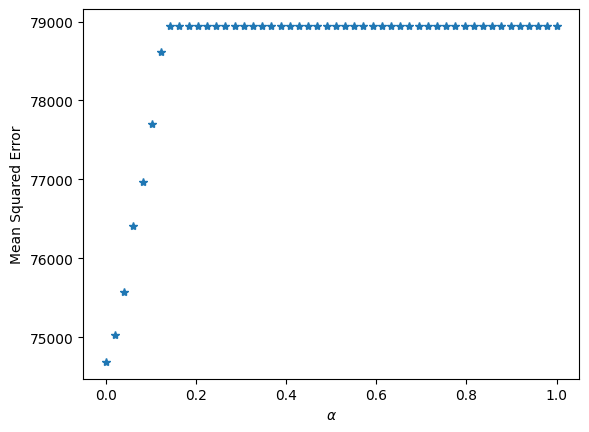

In [81]:
# Plot the MSE against the values of alphas
plt.plot(alphas, cv_errs_lasso, '*')
plt.xlabel(r'$\alpha$')
plt.ylabel('Mean Squared Error')
plt.title('Model 2: baseline variables only')

Text(0, 0.5, 'Lasso Regression Coefficients')

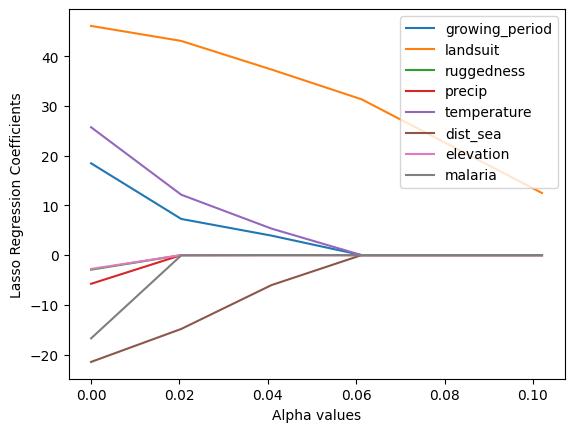

In [83]:
# Create dataframe for storing coefficients for only the 6 least MSE
coefs = pd.DataFrame(coefs_lasso, columns=X_base_cl.columns)
coefs_6 = coefs.iloc[:6,:]
coefs_6.set_index(alphas[0:6], inplace=True)
coefs_6.plot()
plt.xlabel('Alpha values')
plt.ylabel('Lasso Regression Coefficients')
plt.title('Model 2: baseline variables only')

In [84]:
# Run lasso regression with optimal alpha
alpha = 0
lassoReg = make_pipeline(StandardScaler(with_mean=False), Lasso(alpha= alpha * np.sqrt(X2_train.shape[0])))
lassoReg.fit(X2_train, y2_train)

# Add coefficients to dataframe
df_results_X2 = pd.DataFrame({'Variable':X_base_cl.columns, 'Coeff LASSO_X2':lassoReg['lasso'].coef_})
print(df_results_X2)

C:\Users\Lisa\anaconda3\envs\mlta\lib\site-packages\sklearn\pipeline.py:405: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\Lisa\anaconda3\envs\mlta\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(


         Variable  Coeff LASSO_X2
0  growing_period       18.470418
1        landsuit       46.102664
2      ruggedness       -2.931046
3          precip       -5.775899
4     temperature       25.720567
5        dist_sea      -21.487454
6       elevation       -2.780605
7         malaria      -16.749815


C:\Users\Lisa\anaconda3\envs\mlta\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.427e+10, tolerance: 4.958e+06 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
